## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## reading data to dataframe

In [2]:
# importin csv file
df=pd.read_csv("train.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


## checking the shape of data

In [3]:
df.shape

(9800, 18)

In [3]:
# general overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# calculating number of null values
null_count = df["Postal Code"].isnull().sum()
print(null_count)

11


In [6]:
df['Postal Code'].describe()

count     9789.000000
mean     55273.322403
std      32041.223413
min       1040.000000
25%      23223.000000
50%      58103.000000
75%      90008.000000
max      99301.000000
Name: Postal Code, dtype: float64

In [5]:
# filling 0 to empty column

df["Postal Code"].fillna(0, inplace = True)

# changing from floatr to integer

df["Postal Code"] =  df["Postal Code"].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Data Description
generate descriptive stats

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data cleaning

### checking for duplicates

In [7]:
# using conditional statements

if df.duplicated().sum() > 0:
    print("Duplicates exists")
else:
    print("No duplicates")


No duplicates


- using .duplicated format which returns a boolean value.
- it is not most convinient when dealing with large datasets since it returns all rows

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

- using keep parameter
- it is most convinient since it returns the count of duplicate records

In [9]:
df.duplicated(keep = False).sum()

0

## Exploratory Data Analysis
### Customer segmentation

In [10]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [11]:
# type of customers

type_of_customers = df['Segment'].unique()
print(type_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [12]:
# number of customers in each segment

number_of_customers = df['Segment'].value_counts().reset_index()

number_of_customers = number_of_customers.rename(columns = {'Segment':'Customer Type', 'count':'Total customers'}) 
print(number_of_customers)

  Customer Type  Total customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


### ploting pie chart

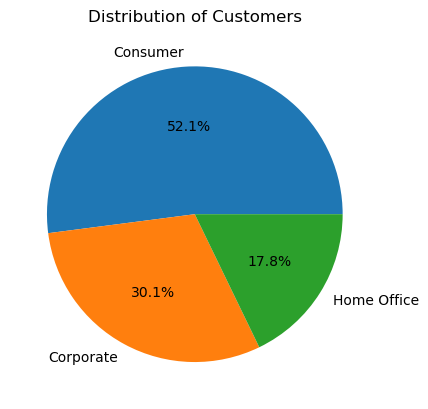

In [13]:
plt.pie(number_of_customers['Total customers'], labels=number_of_customers['Customer Type'], autopct='%1.1f%%')

# set pie chart labels
plt.title('Distribution of Customers')
plt.show()

## customer and sales

In [14]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()

sales_per_category = sales_per_category.rename(columns = {'Segment':'Customer Type', 'Sales':'Total Sales'}) 

print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


### plot a bar graph

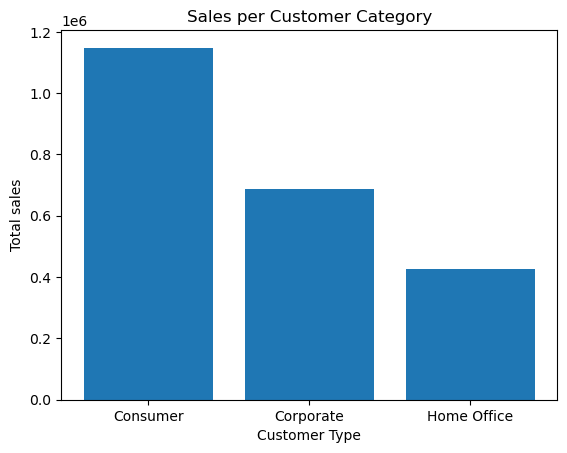

In [15]:
plt.bar(sales_per_category['Customer Type'],sales_per_category['Total Sales'])

# labels

plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total sales')

plt.show()

## Customer loyalty
to determine the frequencies of purchase

In [16]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [17]:
# roup data according to: customer id, customer name,Segment and calc freq. of their orders

customer_order_freq = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()

#rename order id to total orders
customer_order_freq.rename(columns= {'Order ID':'Total Orders'}, inplace= True)

print(customer_order_freq)

    Customer ID       Customer Name    Segment  Total Orders
0      AA-10315          Alex Avila   Consumer            11
1      AA-10375        Allen Armold   Consumer            15
2      AA-10480        Andrew Allen   Consumer            12
3      AA-10645       Anna Andreadi   Consumer            18
4      AB-10015       Aaron Bergman   Consumer             6
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer            28
789    YC-21895      Yoseph Carroll  Corporate             8
790    YS-21880       Yana Sorensen  Corporate            12
791    ZC-21910    Zuschuss Carroll   Consumer            31
792    ZD-21925  Zuschuss Donatelli   Consumer             9

[793 rows x 4 columns]


### sort values in discending order to show most frequent customer

In [18]:
#sort values and print top 10 customers
sorted_curstomers= customer_order_freq.sort_values(by='Total Orders',ascending=False)
print(sorted_curstomers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    CK-12205  Chloris Kastensmidt     Consumer            32
5    SV-20365          Seth Vernon     Consumer            32
6    JD-15895     Jonathan Doherty    Corporate            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


## Best customer in terms of sales

In [19]:
# roup data according to: customer id, customer name,Segment and calc total sales.

#customer_total_sales = df.groupby(['Customer ID','Customer Name','Segment',['Order ID'].count()])['Sales'].sum().reset_index()

#rename order id to total orders
#customer_total_sales.rename(columns= {'Sales':'Total Sales'}, inplace= True)

#print(customer_total_sales)

# Group data by customer id, customer name, and segment, then calculate total sales and total orders.
customer_total_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment']).agg(
    Total_Sales=('Sales', 'sum'),          # Sum of 'Sales'
    Total_Orders=('Order ID', 'count')     # Count of 'Order ID'
).reset_index()

# Display the result
print(customer_total_sales)


    Customer ID       Customer Name    Segment  Total_Sales  Total_Orders
0      AA-10315          Alex Avila   Consumer     5563.560            11
1      AA-10375        Allen Armold   Consumer     1056.390            15
2      AA-10480        Andrew Allen   Consumer     1790.512            12
3      AA-10645       Anna Andreadi   Consumer     5086.935            18
4      AB-10015       Aaron Bergman   Consumer      886.156             6
..          ...                 ...        ...          ...           ...
788    XP-21865        Xylona Preis   Consumer     2374.658            28
789    YC-21895      Yoseph Carroll  Corporate     5454.350             8
790    YS-21880       Yana Sorensen  Corporate     6720.444            12
791    ZC-21910    Zuschuss Carroll   Consumer     8025.707            31
792    ZD-21925  Zuschuss Donatelli   Consumer     1493.944             9

[793 rows x 5 columns]


## sort values in discending order to show top 10 highest sales

In [20]:
#sort values and print top 10 customers
sorted_top_curstomers= customer_total_sales.sort_values(by='Total_Sales',ascending=False)
print(sorted_top_curstomers.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment  Total_Sales  Total_Orders
0    SM-20320         Sean Miller  Home Office    25043.050            15
1    TC-20980        Tamara Chand    Corporate    19052.218            12
2    RB-19360        Raymond Buch     Consumer    15117.339            18
3    TA-21385        Tom Ashbrook  Home Office    14595.620            10
4    AB-10105       Adrian Barton     Consumer    14473.571            20
5    KL-16645        Ken Lonsdale     Consumer    14175.229            29
6    SC-20095        Sanjit Chand     Consumer    14142.334            22
7    HL-15040        Hunter Lopez     Consumer    12873.298            11
8    SE-20110        Sanjit Engle     Consumer    12209.438            19
9    CC-12370  Christopher Conant     Consumer    12129.072            11


## Mode of Shipping

In [21]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [22]:
type_of_shipping = df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [23]:
# frequency of ship mode
type_of_shipping=df['Ship Mode'].value_counts().reset_index()
type_of_shipping= type_of_shipping.rename(columns={'count':'Frequency'})
print(type_of_shipping)

        Ship Mode  Frequency
0  Standard Class       5859
1    Second Class       1902
2     First Class       1501
3        Same Day        538


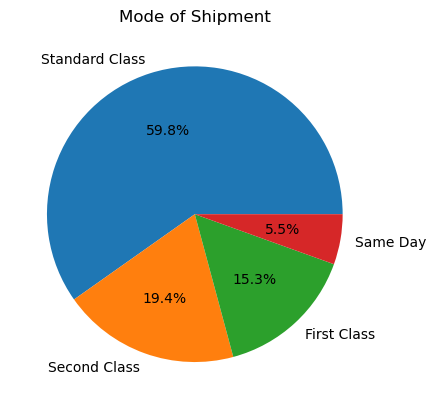

In [24]:
# plot a pie chart to represent the info.

plt.pie(type_of_shipping['Frequency'], labels=type_of_shipping['Ship Mode'], autopct='%1.1f%%')
plt.title('Mode of Shipment')
plt.show()

## Geographical Analysis

In [25]:
# customer by state 
state = df['State'].value_counts().reset_index()

state = state.rename(columns = {'count':'Number of customers'}) 
print(state.head(10))

            State  Number of customers
0      California                 1946
1        New York                 1097
2           Texas                  973
3    Pennsylvania                  582
4      Washington                  504
5        Illinois                  483
6            Ohio                  454
7         Florida                  373
8        Michigan                  253
9  North Carolina                  247


In [26]:
# customer by city
city = df['City'].value_counts().reset_index()

city = city.rename(columns = {'count':'Number of customers'}) 
print(city.head(10))

            City  Number of customers
0  New York City                  891
1    Los Angeles                  728
2   Philadelphia                  532
3  San Francisco                  500
4        Seattle                  426
5        Houston                  374
6        Chicago                  308
7       Columbus                  221
8      San Diego                  170
9    Springfield                  161


In [27]:
# sales per state

sales_state = df.groupby(['State'])['Sales'].sum().reset_index()

sales_state = sales_state.rename(columns = {'Sales':'Total Sales'}) 

sorted_sales = sales_state.sort_values(by='Total Sales',ascending=False)
print(sorted_sales.head(10).reset_index(drop=True))

          State  Total Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [28]:
# sales per city

sales_city = df.groupby(['City'])['Sales'].sum().reset_index()

sales_city = sales_city.rename(columns = {'Sales':'Total Sales'}) 

sorted_city = sales_city.sort_values(by='Total Sales',ascending=False)
print(sorted_city.head(10).reset_index(drop=True))

            City  Total Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


## product Analysis

In [29]:
type_of_product =df['Category'].unique()
print(type_of_product)

['Furniture' 'Office Supplies' 'Technology']


### sales per category

In [30]:
# sales per category
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
print(category_sales)

          Category        Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730


#### ploting bar chart for representation

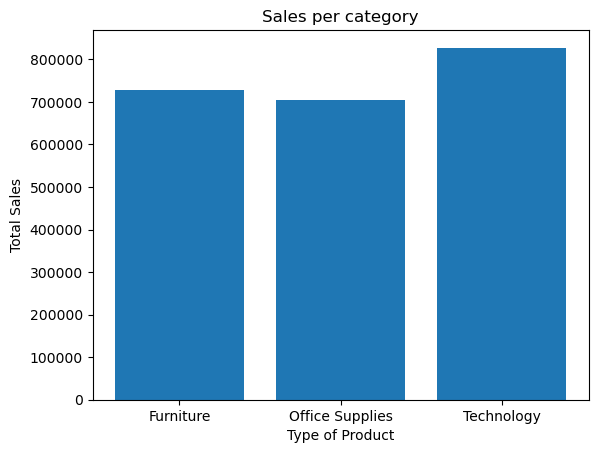

In [31]:
plt.bar(category_sales['Category'],category_sales['Sales'])

plt.title('Sales per category')
plt.xlabel('Type of Product')
plt.ylabel('Total Sales')
plt.show()

### sales per sub_category

In [32]:
# sales per sub_category
subcategory_sales = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

subcategory_sales = subcategory_sales.rename(columns = {'Sales':'Total Sales'}) 

sorted_subcategory = subcategory_sales.sort_values(by='Total Sales', ascending=False)
print(sorted_subcategory.reset_index(drop=True))

   Sub-Category  Total Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


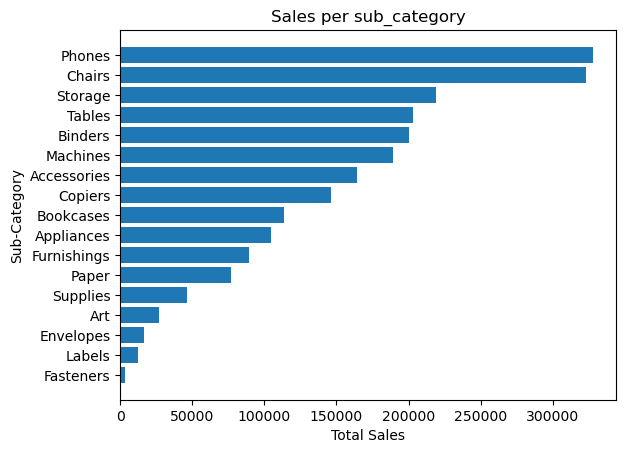

In [33]:
#plotting horizontal bar graph
sorted_subcategory = subcategory_sales.sort_values(by='Total Sales', ascending=True)
plt.barh(sorted_subcategory['Sub-Category'],sorted_subcategory['Total Sales'])

plt.title('Sales per sub_category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')

plt.show()

## sales trend analysis

### Yearly sales

In [34]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)  # to begin with day-month-year 

# Grouping by year and summing sales per year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()

# renaming the columns

yearly_sales= yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})

#sorting values

sorted_yearly_sales =yearly_sales.sort_values(by = 'Total Sales', ascending= False) 

print(sorted_yearly_sales.reset_index(drop=True))


   Year  Total Sales
0  2018  722052.0192
1  2017  600192.5500
2  2015  479856.2081
3  2016  459436.0054


### Graphical representation

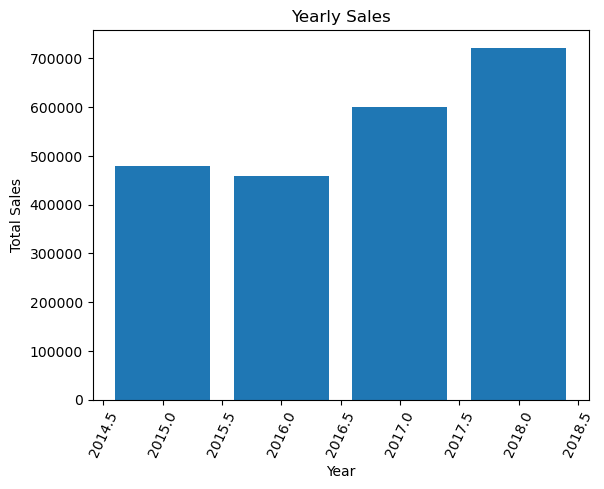

In [35]:
plt.bar(yearly_sales['Year'],yearly_sales['Total Sales'])

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.show()

### Trend line representation

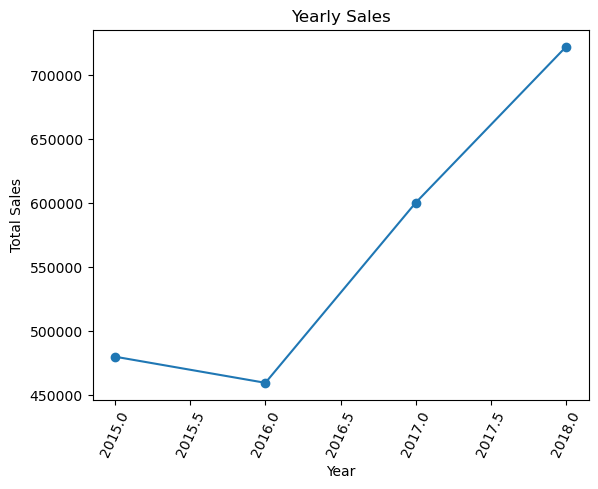

In [36]:
plt.plot(yearly_sales['Year'],yearly_sales['Total Sales'], marker='o', linestyle='-')

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.show()

### Quaterly Trend analysis

In [51]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)  # to begin with day-month-year 

# Filter data according to year

year_sales = df[df['Order Date'].dt.year== 2018]  #only data from 2018

Quaterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum().reset_index() #resample is used to resample data based on a specific frequency like Q which represent quaterly

# renaming the columns

Quaterly_sales = Quaterly_sales.rename(columns={'Order Date':'Quaters','Sales':'Total Sales'})

print(Quaterly_sales)


     Quaters  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


### Trend line represantation

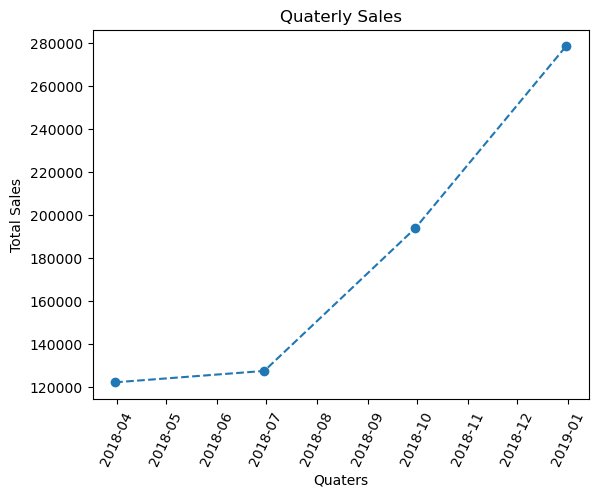

In [54]:
plt.plot(Quaterly_sales['Quaters'],Quaterly_sales['Total Sales'], marker='o', linestyle='--')

plt.title('Quaterly Sales')
plt.xlabel('Quaters')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.show()

## Monthly Trend Analysis

In [56]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)  # to begin with day-month-year 

# Filter data according to year

year_sales = df[df['Order Date'].dt.year== 2018]  #only data from 2018

# Filter data according to months

Monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum().reset_index()

# renaming the columns

Monthly_sales = Monthly_sales.rename(columns={'Order Date':'Months','Sales':'Total Sales'})

print(Monthly_sales)

       Months  Total Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888


### Trendline representation

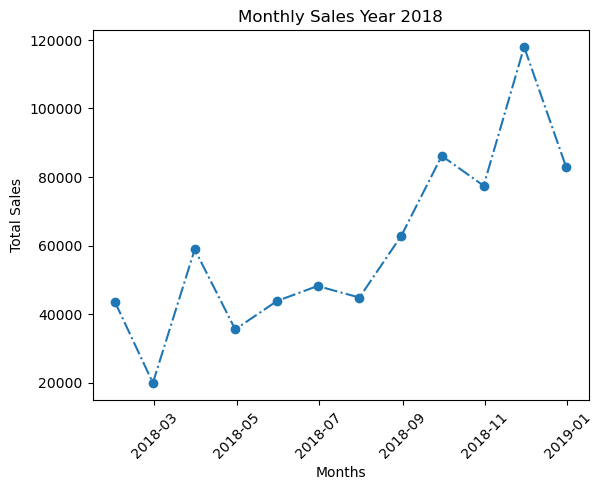

In [58]:
plt.plot(Monthly_sales['Months'],Monthly_sales['Total Sales'], marker='o', linestyle='-.')

plt.title('Monthly Sales Year 2018')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()